### Задание 1.1.1

x: [-10.  -5.   0.   5.  10.] 
 y: [-5.67869023 -3.55641741  0.73396449  1.85286698  3.67594862]
A: [[-10.   1.]
 [ -5.   1.]
 [  0.   1.]
 [  5.   1.]
 [ 10.   1.]]


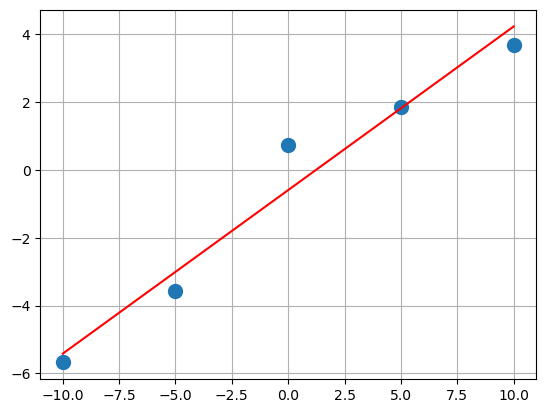

In [1]:
import numpy as np
import numpy.random as random
import matplotlib.pyplot as plt

k = random.rand(5)
b = random.rand(5)
x = np.linspace(-10, 10, 5) 
y = k * x + b

print(f'x: {x} \n y: {y}')

A = np.vstack([x, np.ones(5)]).T
k, b = np.linalg.lstsq(A, y, rcond=None)[0]
print(f'A: {A}')


plt.plot(x, y, 'o', markersize=10)
plt.plot(x, k * x + b, 'r')
plt.grid()
plt.show()

### Задание 1.1.2

x: [-19.54623547 -18.7487483  -16.87480299 -15.57937573 -14.17246618
 -12.87654822 -10.93136322  -9.94746802  -8.93709749  -6.99865763
  -5.78022829  -4.70717757  -2.71964221  -2.16269076  -0.51595844
   1.28682587   2.25300942   3.53515351   5.00483382   6.59930317
   7.52277082   8.89678328  10.27871472  12.06768837  13.67823575
  14.77006878  15.86466577  17.77366872  18.63478291  19.8535902 ] 
 y: [400.63990783 347.28911974 297.17900792 251.80441984 209.66165313
 171.66079551 137.94044732 107.55666174  80.44588196  57.60308002
  38.9169943   23.13799488  11.81943671   4.94544253   0.9159506
   0.80004227   4.17190295  12.61755841  23.23658823  39.17384274
  58.18581355  80.65186385 107.63646236 137.89648423 172.30606073
 210.36213205 251.89151309 297.41522164 346.67469199 400.61355157]
A: [ 1.00474942 -0.44275534  1.21157447]


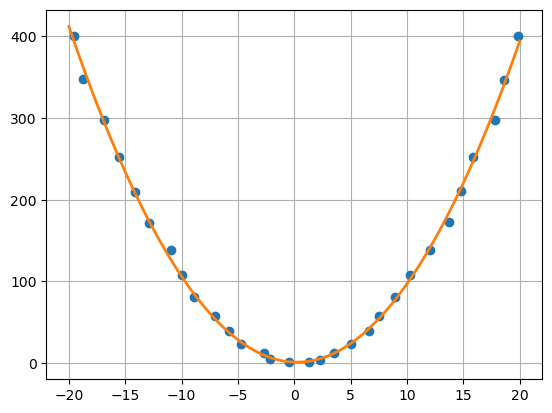

In [2]:
import numpy as np
import numpy.random as random

delta = 1.0
x = np.linspace(-20, 20, 30) 
y = x**2 + delta * (random.rand(30) - 0.2)
x += delta * (random.rand(30) - 0.2)

print(f'x: {x} \n y: {y}')

A = np.vstack([x**2, x, np.ones(30)]).T
A = np.linalg.lstsq(A, y, rcond=None)[0]
print(f'A: {A}')

x_prec = np.linspace(-20, 20, 322)

plt.plot(x, y, 'o')
plt.plot(x_prec, A[0] * x_prec**2 + A[1] * x_prec + A[2], '-', lw=2)
plt.grid()
plt.show()

### Задание 1.1.3

[-20.         -18.62068966 -17.24137931 -15.86206897 -14.48275862
 -13.10344828 -11.72413793 -10.34482759  -8.96551724  -7.5862069
  -6.20689655  -4.82758621  -3.44827586  -2.06896552  -0.68965517
   0.68965517   2.06896552   3.44827586   4.82758621   6.20689655
   7.5862069    8.96551724  10.34482759  11.72413793  13.10344828
  14.48275862  15.86206897  17.24137931  18.62068966  20.        ]
[-7.25600000e+03 -5.81475518e+03 -4.57845521e+03 -3.53135528e+03
 -2.65771061e+03 -1.94177637e+03 -1.36780778e+03 -9.20060027e+02
 -5.82788306e+02 -3.40247817e+02 -1.76693755e+02 -7.63813194e+01
 -2.35657059e+01 -2.50211161e+00  2.55426627e+00  7.34823076e+00
  2.76245849e+01  7.91281315e+01  1.77603674e+02  3.38796015e+02
  5.78449957e+02  9.12310304e+02  1.35612186e+03  1.92562942e+03
  2.63657780e+03  3.50471180e+03  4.54577621e+03  5.77551585e+03
  7.20967551e+03  8.86400000e+03]


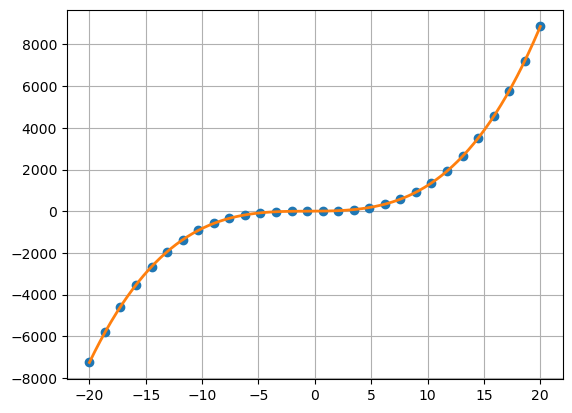

In [3]:
a = 1
b = 2
c = 3
d = 4

x = np.linspace(-20, 20, 30)
y = a * x**3 + b * x**2 + c * x + d
print(x)
print(y)

A = np.vstack([x**3, x**2, x, np.ones(30)]).T
A = np.linalg.lstsq(A, y, rcond=None)[0]

x_spec = np.linspace(-20, 20, 333)

plt.plot(x, y, 'o')
plt.plot(x_spec, A[0] * x_spec**3 + A[1] * x_spec**2 + A[2] * x_spec + A[3], '-', lw=2)
plt.grid()
plt.show()

### Задание 1.1.4 - 1.1.5

[0.24125497 0.75591182 0.48146087]
0.00018180724476914975
0.09572797881176788


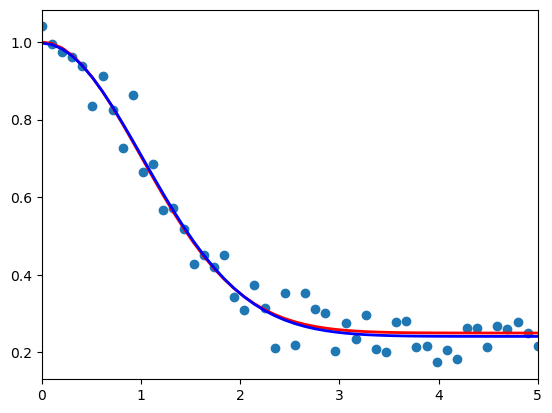

In [4]:
from scipy.optimize import curve_fit

beta = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
    return b0 + b1 * np.exp(-b2 * x**2)

xdata = np.linspace(0, 5, 50)

y = f(xdata, *beta)

ydata = y + 0.05 * np.random.randn(len(xdata))

beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
plt.show()

[0.70624318 0.89983766]
9.76441925356671e-05
0.09660341236416349


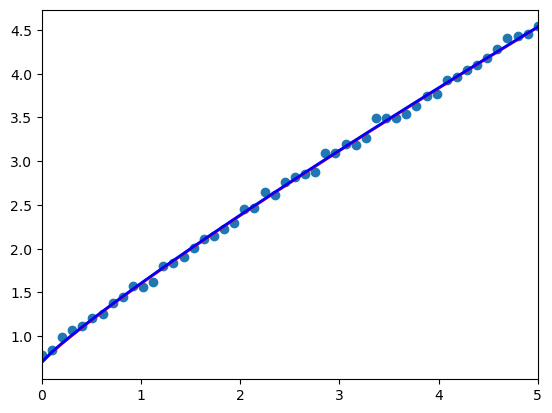

In [5]:
beta = (0.7, 0.9)
def f(x, b0, b1):
    return b0 + b1 * x**b1

xdata = np.linspace(0, 5, 50)

y = f(xdata, *beta)

ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
plt.show()

### Задание 1.2.1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

dataset = pd.read_csv("table.csv", delimiter=',')
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [2]:
print(dataset.shape)
dataset.describe()

(30, 2)


,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [3]:
dataset.columns.tolist()

['YearsExperience', 'Salary']

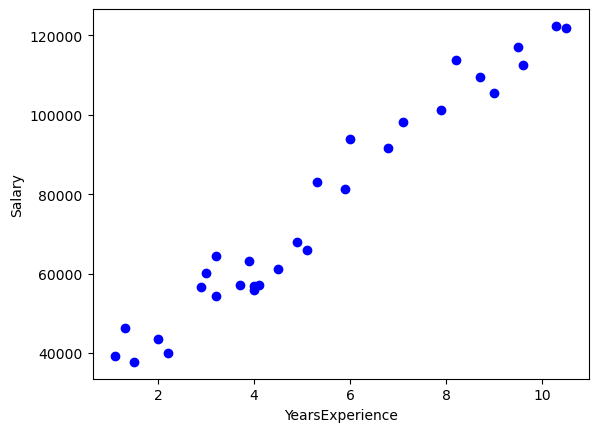

In [4]:
plt.scatter(dataset["YearsExperience"], dataset["Salary"], color='b')
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.show()

In [5]:
x = dataset.iloc[:, : -1].values
y = dataset["Salary"].tolist()
print(x)
print(y)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[39343.0, 46205.0, 37731.0, 43525.0, 39891.0, 56642.0, 60150.0, 54445.0, 64445.0, 57189.0, 63218.0, 55794.0, 56957.0, 57081.0, 61111.0, 67938.0, 66029.0, 83088.0, 81363.0, 93940.0, 91738.0, 98273.0, 101302.0, 113812.0, 109431.0, 105582.0, 116969.0, 112635.0, 122391.0, 121872.0]


In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

In [7]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [8]:
print(regressor.intercept_)
print(regressor.coef_)

26780.09915062818
[9312.57512673]


In [9]:
y_pred = regressor.predict(X_test)

df = pd.DataFrame({'Actual' : Y_test, 'Predicted' : y_pred})
df

,Actual,Predicted
0,37731.0,40748.961841
1,122391.0,122699.622956
2,57081.0,64961.657170
3,63218.0,63099.142145
4,116969.0,115249.562855
5,109431.0,107799.502753


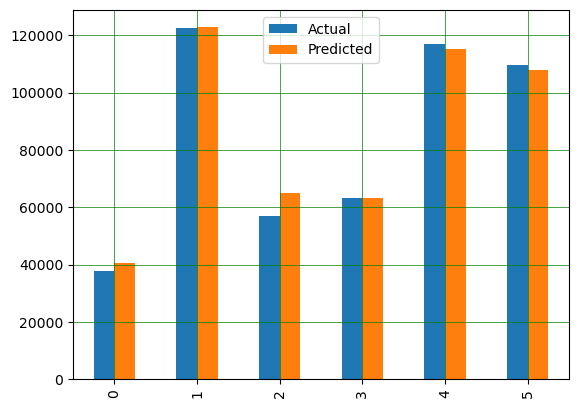

In [10]:
df.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

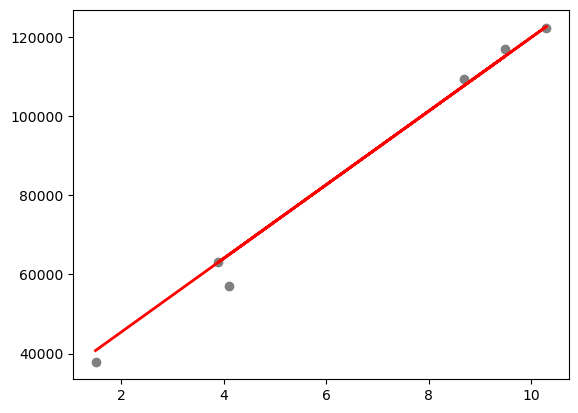

In [11]:
plt.scatter(X_test, Y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

### Задание 1.3.1

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

dataset = pd.read_csv('table_1.csv', delimiter=',')
dataset.head(10)

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410
5,10.0,5342,1333,0.571,457
6,8.0,5319,11868,0.451,344
7,8.0,5126,2138,0.553,467
8,8.0,4447,8577,0.529,464
9,7.0,4512,8507,0.552,498


In [24]:
x = dataset[['Average_income', 'Paved_Highways', 'Population_Driver_licence(%)']]
y = dataset['Petrol_tax']

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [26]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [29]:
coeff_df = pd.DataFrame(regressor.coef_, x.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Average_income,0.000281
Paved_Highways,-0.000160
Population_Driver_licence(%),-5.863864


In [30]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual' : Y_test, 'Predicted' : y_pred})
df

,Actual,Predicted
29,9.0,8.108472
4,8.0,8.710024
26,8.0,7.622893
30,7.0,7.611214
32,8.0,7.158478
37,7.0,7.368015
34,8.0,8.308375
40,7.0,7.568432
7,8.0,8.587632
10,8.0,7.906610


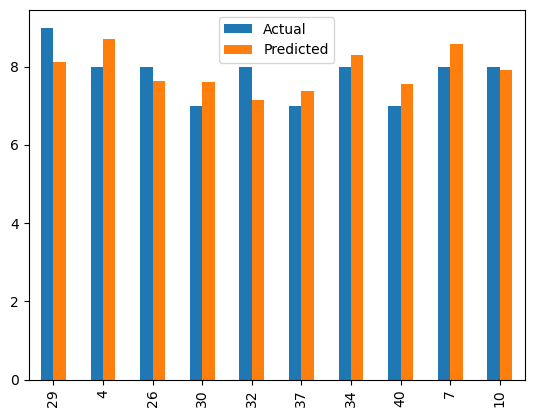

In [31]:
df.plot(kind='bar')
plt.show()

In [32]:
print('MSE: ', metrics.mean_squared_error(Y_test, y_pred))

MSE:  0.3430585790274099
